<a href="https://colab.research.google.com/github/SiddharthNarayanan8194/Tasks-Sparks-Foundation-SEP23/blob/main/Task2_GRIP_SEP23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Siddharth Narayanan**
## **Data Science and Business Analytics Intern @ The Sparks Foundation**
### **Task 2**: Prediction using Unsupervised ML
### **Objective**: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### **Importing Libraries**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets




### **Loading the 'Iris' Dataset**

In [44]:
Iris = datasets.load_iris()
Iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print('Dataset Loaded Successfully')


Dataset Loaded Successfully


### **Exploring the Data**

In [45]:
Iris_df.head(10) # Showing first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [46]:
Iris_df.tail(10) # Showing the last ten rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [47]:
Iris_df.info() # Displaying information about the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [48]:
Iris_df.isnull().sum() # Checking for any null values in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no null values present in the 'Iris' dataset.

In [49]:
Iris_df.describe() # Displaying information on Descriptive Statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Finding the Optimum Number of Clusters for K-Means Classification**

In the K-Means Clustering Algorithm, we are going to use the Elbow Method for finding the optimum number of clusters. In this task, we do not need 'Id' and 'Species' columns therefore, they are excluded.

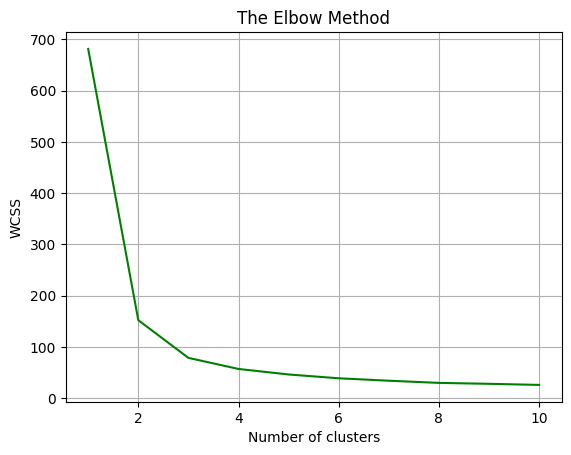

In [50]:
x = Iris_df.iloc[:,0:4].values # Retrieving all column values that we need for this task
from sklearn.cluster import KMeans
WCSS_list = [] # Initializing an empty list for the values of WCSS for different values of k ranging from 1 to 10
# Using for loop for iterations from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS_list.append(kmeans.inertia_)
# Plotting the results onto a line graph to observe'The elbow'
plt.plot(range(1, 11), WCSS_list,color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()



The shape of the curve in the above graph resembles to an elbow that's why it is called 'The Elbow Method'.From the above plot, we can see the elbow point is at 3 when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.From this we choose the number of clusters as 3.

### **Training the K-Means Algorithm On the Dataset**

To train the model, instead of using i in the n_clusters as above, we will use 3 as we know there are 3 clusters that need to be formed.

In [51]:
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter = 300, n_init = 10, random_state= 0)
y_kmeans= kmeans.fit_predict(x)

### **Visualizing the Clusters**

The last step is to visualize all the clusters. As we have 3 clusters for our model, so we will visualize each cluster one by one.

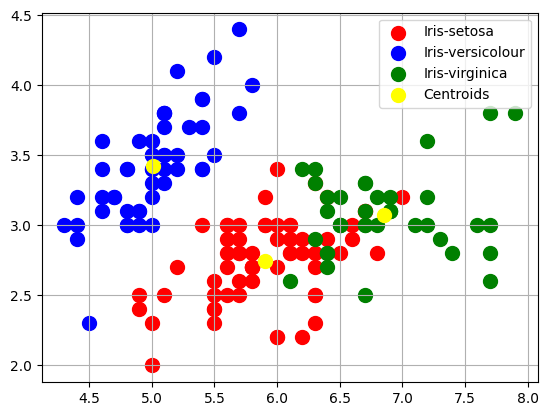

In [52]:
# Visualizing the clusters- On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa') # for first cluster
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour') # for second cluster
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
             s = 100, c = 'green', label = 'Iris-virginica') # for third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids') # for centroids
plt.grid()
plt.legend()

In the above code lines for scatter plot, 's' is the marker size and 'c' is the color of the marker.